In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve


In [4]:
# Carregando os dados
df = load_breast_cancer()

In [101]:
# Definindo o Target e separando os dados de Treinamento e Teste
data = df.data
target = df.target
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [102]:
# Criação, treino e previsões com o conjunto de dados de teste
model = LogisticRegression( max_iter=10000, random_state=1032)
model.fit(data_train, target_train)
target_pred = model.predict(data_test)

In [103]:
# Matriz de Confusão
matrix_conf = confusion_matrix(target_test, target_pred)
print("Matriz de Confusão\n", matrix_conf)

Matriz de Confusão
 [[ 61   2]
 [  2 106]]


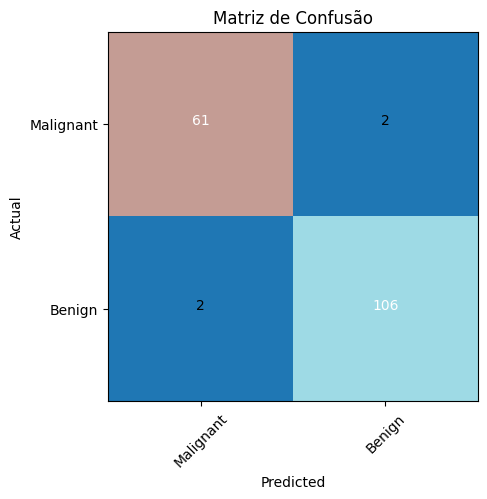

In [104]:
# Plotando a matriz de confusão
labels = ['Malignant', 'Benign']

plt.imshow(matrix_conf, interpolation='nearest', cmap=plt.cm.tab20)
plt.title('Matriz de Confusão')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
thresh = matrix_conf.max() / 2.
for i in range(matrix_conf.shape[0]):
    for j in range(matrix_conf.shape[1]):
        plt.text(j, i, format(matrix_conf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if matrix_conf[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')

# Exibir o gráfico
plt.show()

As métricas de avaliação de modelos de aprendizado de máquina são utilizados para medir a qualidade e o desempenho dos modelos em relação aos dados de teste.

In [105]:
# Acurácia
print("Acurácia Regressão Logística:", accuracy_score(target_test, target_pred))

Acurácia Regressão Logística: 0.9766081871345029


A Acurácia/Accuracy apresenta uma performance geral do modelo, apontando quantas classificações foram feitas corretamente ou incorretamente. É a proporção de de previsões verdadeiras em relação ao todo. Entretanto, caso os dados estejam desequilibrados esta métrica pode apresentar resultados não confiáveis.

In [106]:
# Precisão
print("Precisão Regressão Logística:", precision_score(target_test, target_pred, average='weighted'))

Precisão Regressão Logística: 0.9766081871345029


A Precisão/Precision apresenta uma perfomance dentre as classificações da classe Positivo, ou seja, apresenta a quantidade de classificações feitas corretamente apenas com base nos exemplos previstos como positivos. Útil para evitar classificar incorretamente exemplos  negativos como positivos.

In [107]:
# Revocação
print("Revocação Regressão Logística:", recall_score(target_test, target_pred, average='weighted'))

Revocação Regressão Logística: 0.9766081871345029


A Revocação/Recall apresenta a proporção de exemplos positivos previstos corretamente em relação ao total de exemplos reais positivos. Útil para evitar de deixar de classificar exemplos positivos como positivos.

In [108]:
# Medida F1-score
print("Medida F1_score Regressão Logística:", f1_score(target_test, target_pred, average='weighted'))

Medida F1_score Regressão Logística: 0.9766081871345029


O F1-score é uma combinação da Precisão e revocação de maneira equilibrada que fornece uma medida geral de equilibrio entre as métricas.

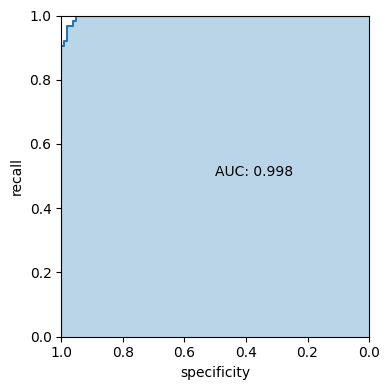

In [109]:
fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(data_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

O AUC-ROC representa a área sob a curva ROC. A curva ROC fornece uma medida de verdadeiros positivos em relação a taxa de falsos positivos para diferentes limiares declassificação.

Com o valor de 0.998, a métrica sugere que o modelo tem uma excelente performance, tendo uma ótima capacidade de discriminar e classificar corretamente as classes positivas e negativas.

VALIDAÇÃO CRUZADA

In [110]:
# Carregando os dados
df = load_breast_cancer()

In [111]:
# Definindo o Target e separando os dados de Treinamento/Validação e Teste/Validação
data = df.data
target = df.target
data_train, data_val_test, target_train, target_val_test = train_test_split(data, target, test_size=0.3, random_state=42)
data_test, data_val, target_test, target_val =train_test_split(data_val_test, target_val_test, test_size=0.5, random_state=42)

In [116]:
# Criando o modelo, aplicando a validação cruzada 10-fold no modelo
model = LogisticRegression(max_iter=10000, random_state=1032)
score = cross_val_score(model, data_train, target_train, cv=10)

In [113]:
# Treinando e ajustando o modelo com o conjunto de treino
model.fit(data_train, target_train)

LogisticRegression(max_iter=10000, random_state=1032)

In [114]:
# Fazendo previsões nos conjuntos de teste e validação e imprimindo as métricas de classificação
target_pred_test = model.predict(data_test)
target_pred_val = model.predict(data_val)
print("Métricas de classificação para Logistic Regression no conjunto de teste: ")
print(classification_report(target_test, target_pred_test))

Métricas de classificação para Logistic Regression no conjunto de teste: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.96      1.00      0.98        48

    accuracy                           0.98        85
   macro avg       0.98      0.97      0.98        85
weighted avg       0.98      0.98      0.98        85



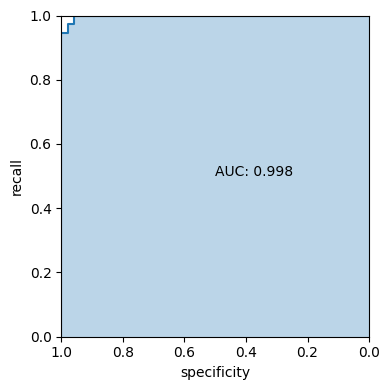

In [115]:
fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(data_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()